<a href="https://colab.research.google.com/github/leorumma/inteligencia-artificial-regressao-linear/blob/main/regressao-linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [300]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

Importando o dataset e criando os vetores bidimensionais

In [301]:
data = pd.read_csv('exemplo.csv',header=0)
vetorX = np.array([data.X]).transpose()
vetorY = np.array([data.Y]).transpose()
print(str(data) + "\n")
print("Valores do vetor X" + "\n {} \n".format(vetorX))
print("Valores do vetor Y" + "\n {} \n".format(vetorY))

           X           Y
0  28.816847   60.854133
1  35.757619   67.590670
2  53.821076  110.762773
3  58.215693  115.785785
4  66.809748  125.311129
5  78.252814  149.003866
6  80.648697  159.619414
7  81.296082  157.985286
8  95.724162  197.179636
9  99.958481  196.907397

Valores do vetor X
 [[28.81684742]
 [35.75761893]
 [53.82107634]
 [58.21569264]
 [66.80974831]
 [78.25281369]
 [80.64869706]
 [81.29608217]
 [95.72416241]
 [99.95848131]] 

Valores do vetor Y
 [[ 60.85413282]
 [ 67.59066954]
 [110.76277271]
 [115.78578459]
 [125.31112852]
 [149.00386554]
 [159.61941373]
 [157.98528569]
 [197.17963609]
 [196.90739698]] 



Nesse momento, estamos fazendo um treinamento sem especificar para a biblioteca LinearRegression() a porcentagem
de divisão entre treinamento e teste.

Nosso objetivo é que dado um elemento do vetorX eu consiga predizer um possivel candidato do vetorYPred. 

Inicialmente chamamos a função modelo.fit que realizara o treinamento e após isso modelo.predict() que retornara um vetorYPred.

com os atributos modelo.intercept_ e modelo.coef_ consigo obter os thetas que estão moldando minha função linear. 


In [302]:
modeloSemTrainTestSplit = LinearRegression()
modeloSemTrainTestSplit.fit(vetorX, vetorY)
vetorYPred = modeloSemTrainTestSplit.predict(vetorX)
print("Valores do vetorYPred \n{}\n".format(vetorYPred))
print("Valores do: \n theta1 \n {} \n \n theta2 \n {}".format(modeloSemTrainTestSplit.intercept_, modeloSemTrainTestSplit.coef_))

Valores do vetorYPred 
[[ 56.83577888]
 [ 70.54655532]
 [106.22904771]
 [114.91015782]
 [131.88682619]
 [154.49141866]
 [159.22423852]
 [160.50308087]
 [189.00426154]
 [197.36872071]]

Valores do: 
 theta1 
 [-0.0889236] 
 
 theta2 
 [[1.9753966]]


explicar grafico

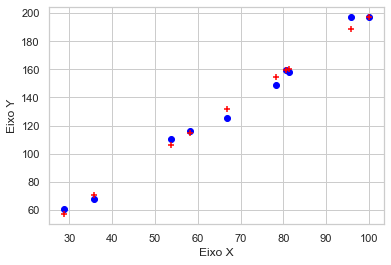

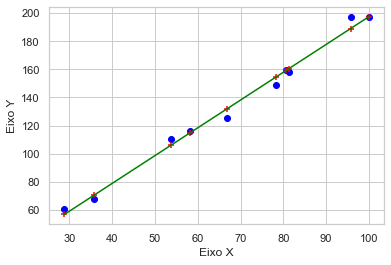

In [303]:
plt.scatter(vetorX, vetorY,marker='o',color='blue')
plt.scatter(vetorX, vetorYPred,marker='+',color='red')
plt.savefig('pontos_originais_previstos.png')
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()

plt.scatter(vetorX, vetorY,marker='o',color='blue') 
plt.scatter(vetorX, vetorYPred,marker='+',color='red')
plt.plot(vetorX, vetorYPred, color='green')
plt.savefig('reta_prevista.png')
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()

Calculando erro

In [304]:
RMSE = mean_squared_error(vetorY, vetorYPred, squared=False)
print(RMSE)

4.394358626600398


In [305]:
modeloComTrainTestSplit = LinearRegression()

X_treino, X_teste, vetorY_treino, vetorY_teste = train_test_split(vetorX, vetorY, test_size=0.3, train_size=0.7, random_state=42)

modeloComTrainTestSplit.fit(X_treino, vetorY_treino)
vetorYPred_teste = modeloComTrainTestSplit.predict(X_teste)
print(X_teste)
print("Valores do vetorYPred \n{}\n".format(vetorYPred_teste))
print("Valores do: \n theta1 \n {} \n \n theta2 \n {}".format(modeloComTrainTestSplit.intercept_, modeloComTrainTestSplit.coef_))

[[95.72416241]
 [35.75761893]
 [78.25281369]]
Valores do vetorYPred 
[[186.65585117]
 [ 73.19487668]
 [153.5988141 ]]

Valores do: 
 theta1 
 [5.53891297] 
 
 theta2 
 [[1.89207128]]


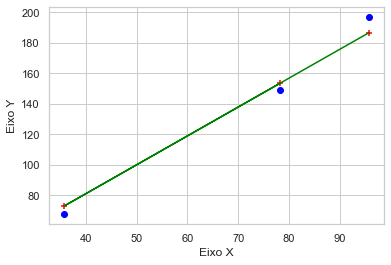

In [306]:
plt.scatter(X_teste, vetorY_teste, marker='o', color='blue') 
plt.scatter(X_teste, vetorYPred_teste, marker='+', color='red')
plt.plot(X_teste, vetorYPred_teste, color='green')
plt.savefig('reta_prevista.png')
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()

In [307]:
 generalizar = modeloComTrainTestSplit.predict(vetorX)
print(generalizar)

[[ 60.06244227]
 [ 73.19487668]
 [107.3722256 ]
 [115.68715288]
 [131.94771877]
 [153.5988141 ]
 [158.1319962 ]
 [159.35689497]
 [186.65585117]
 [194.66748434]]


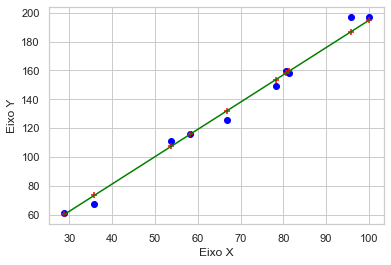

In [308]:
plt.scatter(vetorX, vetorY, marker='o', color='blue') 
plt.scatter(vetorX, generalizar, marker='+', color='red')
plt.plot(vetorX, generalizar, color='green')
plt.savefig('reta_prevista.png')
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()

In [309]:
RMSE = mean_squared_error(vetorY, generalizar, squared=False)
print(RMSE)

4.780777262876109


In [310]:
print(generalizar)

[[ 60.06244227]
 [ 73.19487668]
 [107.3722256 ]
 [115.68715288]
 [131.94771877]
 [153.5988141 ]
 [158.1319962 ]
 [159.35689497]
 [186.65585117]
 [194.66748434]]


In [311]:
print(vetorYPred)

[[ 56.83577888]
 [ 70.54655532]
 [106.22904771]
 [114.91015782]
 [131.88682619]
 [154.49141866]
 [159.22423852]
 [160.50308087]
 [189.00426154]
 [197.36872071]]


In [312]:
print (vetorY)

[[ 60.85413282]
 [ 67.59066954]
 [110.76277271]
 [115.78578459]
 [125.31112852]
 [149.00386554]
 [159.61941373]
 [157.98528569]
 [197.17963609]
 [196.90739698]]


# Regressão linear - Varias Variaveis

In [313]:
dataset2 = pd.read_csv('multi.csv')
dataset2_x1 = dataset2.X1
dataset2_x2 = dataset2.X2
dataset2_x3 = dataset2.X3
dataset2_x4 = dataset2.X4
dataset2_x5 = dataset2.X5
dataset2.describe()

,X1,X2,X3,X4,X5
count,24.000000,24.000000,24.000000,24.00000,24.000000
mean,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,0.510754,3.526299,0.349527,0.33002,210.735341
min,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,2017.000000,12.000000,2.750000,6.20000,1464.000000


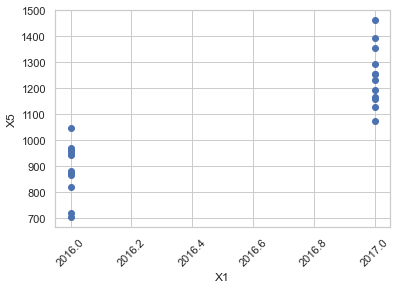

In [314]:
plt.scatter(dataset2_x1,dataset2_x5,color='b')
plt.xlabel('X1')
plt.ylabel('X5')
plt.axis([min(dataset2_x1),max(dataset2_x1),min(dataset2_x5),max(dataset2_x5)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=45)
plt.show()

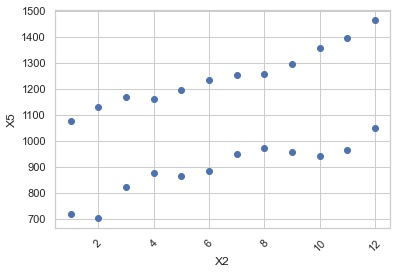

In [315]:
plt.scatter(dataset2_x2,dataset2_x5,color='b')
plt.xlabel('X2')
plt.ylabel('X5')
plt.axis([min(dataset2_x2),max(dataset2_x2),min(dataset2_x5),max(dataset2_x5)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=45)
plt.show()

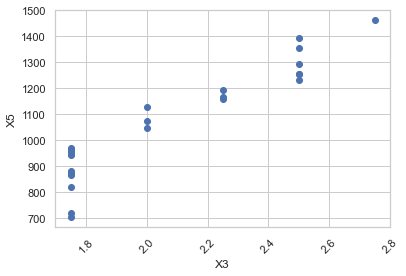

In [316]:
plt.scatter(dataset2_x3,dataset2_x5,color='b')
plt.xlabel('X3')
plt.ylabel('X5')
plt.axis([min(dataset2_x2),max(dataset2_x3),min(dataset2_x5),max(dataset2_x5)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=45)
plt.show()

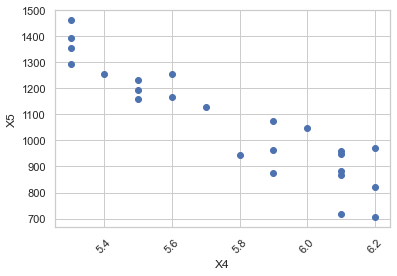

In [317]:
plt.scatter(dataset2_x4,dataset2_x5,color='b')
plt.xlabel('X4')
plt.ylabel('X5')
plt.axis([min(dataset2_x2),max(dataset2_x4),min(dataset2_x5),max(dataset2_x5)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=45)
plt.show()

As features que possuem relação linear com x5 são x2, x3 e x4

In [318]:
features = ['X2','X3','X4']
datasetMulti = dataset2[features]
vetorYMulti = np.array([dataset2.X5]).transpose()

In [319]:
modeloMulti = LinearRegression()
modeloMulti.fit(datasetMulti, vetorYMulti)
print("Valores do: \n theta1 \n {} \n \n theta2 \n {}".format(modeloMulti.intercept_, modeloMulti.coef_))

Valores do: 
 theta1 
 [1591.59633828] 
 
 theta2 
 [[  10.18248697  335.19306016 -222.08250238]]


In [320]:
print(vetorYMulti)
print("\n")
print(modeloMulti.predict(datasetMulti))

[[1464]
 [1394]
 [1357]
 [1293]
 [1256]
 [1254]
 [1234]
 [1195]
 [1159]
 [1167]
 [1130]
 [1075]
 [1047]
 [ 965]
 [ 943]
 [ 958]
 [ 971]
 [ 949]
 [ 884]
 [ 866]
 [ 876]
 [ 822]
 [ 704]
 [ 719]]


[[1458.52983479]
 [1364.54908277]
 [1354.3665958 ]
 [1344.18410883]
 [1311.79337162]
 [1257.19438418]
 [1269.22014745]
 [1175.23939543]
 [1165.05690846]
 [1132.66617126]
 [1016.47716901]
 [ 961.87818156]
 [1051.677288  ]
 [ 979.90478623]
 [ 991.93054949]
 [ 915.12331181]
 [ 882.7325746 ]
 [ 894.75833787]
 [ 884.5758509 ]
 [ 874.39336393]
 [ 908.62737743]
 [ 831.82013975]
 [ 821.63765278]
 [ 833.66341605]]


In [321]:
RMSE = mean_squared_error(vetorYMulti, modeloMulti.predict(datasetMulti), squared=False)
print(RMSE)

57.22964014460865


In [322]:
modeloMultiComTrainTestSplit = LinearRegression()
x_treino, x_teste, y_treino, y_teste = train_test_split(datasetMulti, vetorYMulti, test_size=0.25, train_size=0.75, random_state=42)
modeloMultiComTrainTestSplit.fit(x_treino, y_treino)
y_pred = modeloMultiComTrainTestSplit.predict(x_teste)
print(y_pred)
print(y_teste)
print("Valores do: \n theta1 \n {} \n \n theta2 \n {}".format(modeloMultiComTrainTestSplit.intercept_, modeloMultiComTrainTestSplit.coef_))

[[1152.68181072]
 [ 861.92805041]
 [1452.5492944 ]
 [ 865.14981562]
 [ 930.02639963]
 [1111.62622134]]
[[1159]
 [ 971]
 [1464]
 [ 884]
 [1075]
 [1167]]
Valores do: 
 theta1 
 [2027.27506347] 
 
 theta2 
 [[  12.61127472  284.17731317 -284.44314659]]


In [326]:
RMSE = mean_squared_error(y_teste, y_pred, squared=False)
print(RMSE)

78.00283967182416


In [323]:
RMSE = mean_squared_error(vetorYMulti, modeloMulti.predict(datasetMulti), squared=False)
print(RMSE)

57.22964014460865
